# AON Study Figures
Author: Olaf Borghi olafborghi@gmail.com

## Prepare Setup

### Define fixed parameters, load libraries/modules

**Load modules**

In [66]:
# Import necessary packages and modules
%matplotlib inline
# libraries
import os
import numpy as np
import nibabel as nib
import pandas as pd
import nilearn as nl
from matplotlib import pyplot as plt
# specific modules
from nilearn import plotting, datasets, image
from nilearn.image import math_img
from nilearn import surface
from pathlib import Path
from pprint import pprint
from atlasreader import get_statmap_info
print(nl.__version__) # print nilearn version

0.9.2


**Set fixed parameters**

In [67]:
# fixed folders
basedir = Path("/home/olafb99/mnt/a471/userdata/olafb99/shared/03_AON_ACTION/")
outputdir = Path(basedir / "derivatives")
datadir = Path(basedir / "01_data")
first_level_dir = first_level_dir = outputdir / "first_level"
action_first_level_dir = first_level_dir / "action-task"
AON_first_level_dir = first_level_dir / "AON-task"
masks_templates_dir = outputdir / "masks_templates"
second_level_dir = outputdir / "second_level"
AON_second_level_dir = second_level_dir / "AON-task"
action_second_level_dir = second_level_dir / "action-task"
atlas_dir = outputdir / "brain_atlases"
roi_dir = masks_templates_dir / "ROI_masks"
plot_dir = second_level_dir / "plots"

# make folder to store surf mesh
if not os.path.exists(masks_templates_dir / "surf_mesh"):
    os.makedirs(masks_templates_dir / "surf_mesh")
surf_dir = masks_templates_dir / "surf_mesh"

# load the MNI template
template = datasets.load_mni152_template(resolution=1)

**Download surf mesh**

In [33]:
fsaverage = datasets.fetch_surf_fsaverage(mesh='fsaverage6', data_dir=surf_dir)

# bg for right hemisphere
curv_right = surface.load_surf_data(fsaverage.curv_right)
curv_right_sign = np.sign(curv_right)

# bg for left hemisphere
curv_left = surface.load_surf_data(fsaverage.curv_left)
curv_left_sign = np.sign(curv_left)

**Load thresholded images for the plots**

In [34]:
# AON > baseline
aon_thresholded_map = AON_second_level_dir / "AON-baseline_z_map_threshold.nii.gz"
aon_cluster_threshold = 223
aon_thresholded_map = image.threshold_img(aon_thresholded_map, threshold=0, cluster_threshold=aon_cluster_threshold)
# scrambled > baseline
scrambled_thresholded_map = AON_second_level_dir / "scrambled-baseline_z_map_threshold.nii.gz"
scrambled_cluster_threshold = 191
scrambled_thresholded_map = image.threshold_img(scrambled_thresholded_map, threshold=0, cluster_threshold=scrambled_cluster_threshold)
# ghost > baseline
ghost_thresholded_map = AON_second_level_dir / "ghost-baseline_z_map_threshold.nii.gz"
ghost_cluster_threshold = 188
ghost_thresholded_map = image.threshold_img(ghost_thresholded_map, threshold=0, cluster_threshold=ghost_cluster_threshold)
# transitive > intransitive
transitive_intransitive_thresholded_map = AON_second_level_dir / "transitive-intransitive_z_map_threshold.nii.gz"
transitive_intransitive_cluster_threshold = 62
transitive_intransitive_thresholded_map = image.threshold_img(transitive_intransitive_thresholded_map, threshold=0, cluster_threshold=transitive_intransitive_cluster_threshold)
# intransitive > transitive
intransitive_transitive_thresholded_map = AON_second_level_dir / "intransitive-transitive_z_map_threshold.nii.gz"
intransitive_transitive_cluster_threshold = 62
intransitive_transitive_thresholded_map = image.threshold_img(intransitive_transitive_thresholded_map, threshold=0, cluster_threshold=intransitive_transitive_cluster_threshold)
# human > dog
human_dog_thresholded_map = AON_second_level_dir / "human-dog_z_map_threshold.nii.gz"
human_dog_cluster_threshold = 163
human_dog_thresholded_map = image.threshold_img(human_dog_thresholded_map, threshold=0, cluster_threshold=human_dog_cluster_threshold)
# dog > human
dog_human_thresholded_map = AON_second_level_dir / "dog-human_z_map_threshold.nii.gz"
dog_human_cluster_threshold = 163
dog_human_thresholded_map = image.threshold_img(dog_human_thresholded_map, threshold=0, cluster_threshold=dog_human_cluster_threshold)
# dog ghost > human ghost
dog_ghost_thresholded_map = AON_second_level_dir / "dog_ghost-human_ghost_z_map_threshold.nii.gz"
dog_ghost_cluster_threshold = 74
dog_ghost_thresholded_map = image.threshold_img(dog_ghost_thresholded_map, threshold=0, cluster_threshold=dog_ghost_cluster_threshold)
# human ghost > dog ghost
human_ghost_thresholded_map = AON_second_level_dir / "human_ghost-dog_ghost_z_map_threshold.nii.gz"
human_ghost_cluster_threshold = 74
human_ghost_thresholded_map = image.threshold_img(human_ghost_thresholded_map, threshold=0, cluster_threshold=human_ghost_cluster_threshold)
# dog scrambled > baseline
dog_scrambled_thresholded_map = AON_second_level_dir / "dog_scrambled-baseline_z_map_threshold.nii.gz"
dog_scrambled_cluster_threshold = 159
dog_scrambled_thresholded_map = image.threshold_img(dog_scrambled_thresholded_map, threshold=0, cluster_threshold=dog_scrambled_cluster_threshold)
# human scrambled > baseline
human_scrambled_thresholded_map = AON_second_level_dir / "human_scrambled-baseline_z_map_threshold.nii.gz"
human_scrambled_cluster_threshold = 181
human_scrambled_thresholded_map = image.threshold_img(human_scrambled_thresholded_map, threshold=0, cluster_threshold=human_scrambled_cluster_threshold)
# dog scrambled > human scrambled
dog_scrambled_human_scrambled_thresholded_map = AON_second_level_dir / "dog_scrambled-human_scrambled_z_map_threshold.nii.gz"
dog_scrambled_human_scrambled_cluster_threshold = 67
dog_scrambled_human_scrambled_thresholded_map = image.threshold_img(dog_scrambled_human_scrambled_thresholded_map, threshold=0, cluster_threshold=dog_scrambled_human_scrambled_cluster_threshold)
# human scrambled > dog scrambled 
human_scrambled_dog_scrambled_thresholded_map = AON_second_level_dir / "human_scrambled-dog_scrambled_z_map_threshold.nii.gz"
human_scrambled_dog_scrambled_cluster_threshold = 67
human_scrambled_dog_scrambled_thresholded_map = image.threshold_img(human_scrambled_dog_scrambled_thresholded_map, threshold=0, cluster_threshold=human_scrambled_dog_scrambled_cluster_threshold)
# action > baseline
action_thresholded_map = action_second_level_dir / "action-baseline_z_map_threshold.nii.gz"
action_cluster_threshold = 274
action_thresholded_map = image.threshold_img(action_thresholded_map, threshold=0, cluster_threshold=action_cluster_threshold)

## Figure 2 (Surface Plots)

1.	All action > baseline
2.	All scrambled > baseline 
3.	All ghost > baseline 

All action observation > baseline

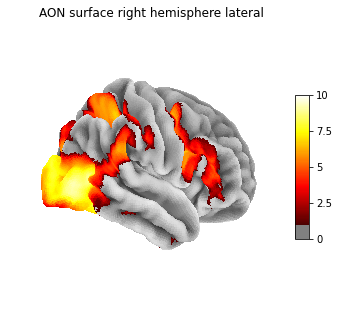

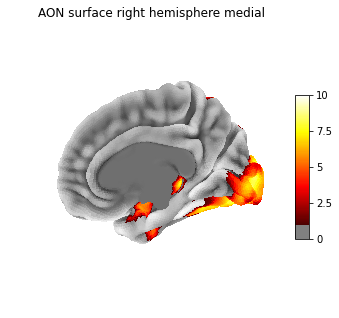

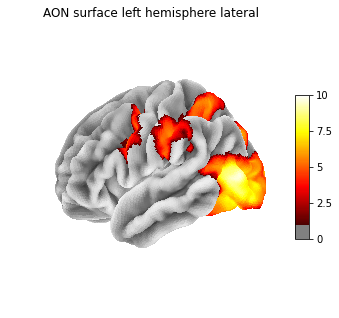

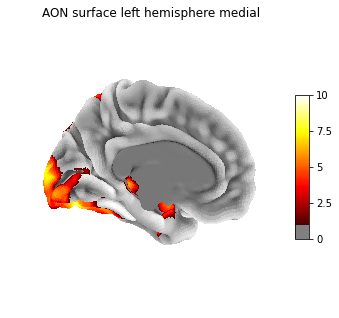

In [35]:
# sample the stat maps around freesurfer mesh
aon_texture_r = surface.vol_to_surf(aon_thresholded_map, fsaverage.pial_right)
aon_texture_l = surface.vol_to_surf(aon_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
aon_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_right, aon_texture_r, hemi='right', view='lateral',
    title='AON surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
aon_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_right, aon_texture_r, hemi='right', view='medial',
    title='AON surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)

# left hemi
aon_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_left, aon_texture_l, hemi='left', view='lateral',
    title='AON surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)
aon_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_left, aon_texture_l, hemi='left', view='medial',
    title='AON surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)

# show the figures
aon_texture_fig_right_lateral.show()
aon_texture_fig_right_medial.show()
aon_texture_fig_left_lateral.show()
aon_texture_fig_left_medial.show()

# save the figures locally
aon_texture_fig_right_lateral.savefig(plot_dir / 'aon_texture_fig_right_lateral')
aon_texture_fig_right_medial.savefig(plot_dir / 'aon_texture_fig_right_medial')
aon_texture_fig_left_lateral.savefig(plot_dir / 'aon_texture_fig_left_lateral')
aon_texture_fig_left_medial.savefig(plot_dir / 'aon_texture_fig_left_medial')

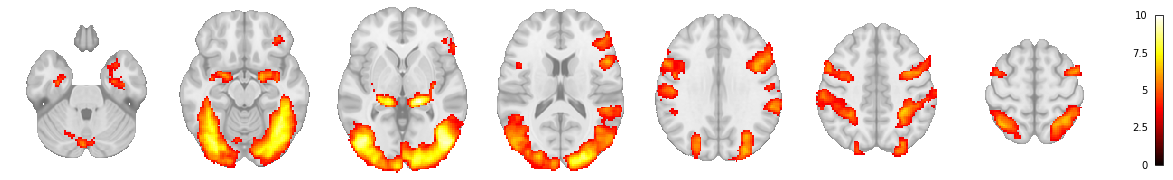

In [36]:
aon_z_fig = plotting.plot_stat_map(aon_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)

aon_z_fig.savefig(plot_dir / 'aon_z_fig')

Scrambled > baseline

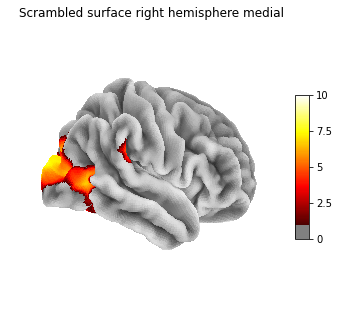

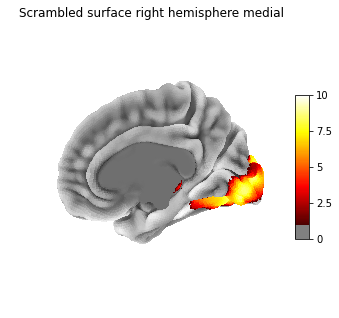

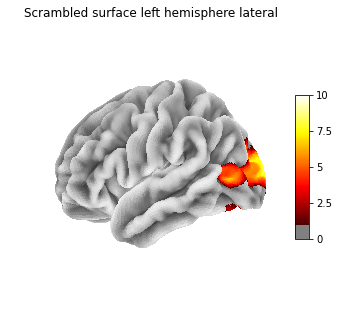

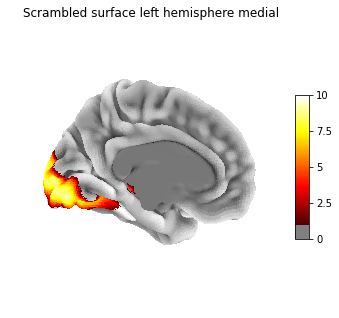

In [37]:
# sample the stat maps around freesurfer mesh
scrambled_texture_r = surface.vol_to_surf(scrambled_thresholded_map, fsaverage.pial_right)
scrambled_texture_l = surface.vol_to_surf(scrambled_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
scrambled_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_right, scrambled_texture_r, hemi='right', view='lateral',
    title='Scrambled surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
scrambled_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_right, scrambled_texture_r, hemi='right', view='medial',
    title='Scrambled surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
# left hemi
scrambled_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_left, scrambled_texture_l, hemi='left', view='lateral',
    title='Scrambled surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)
scrambled_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_left, scrambled_texture_l, hemi='left', view='medial',
    title='Scrambled surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)

# show the figures
scrambled_texture_fig_right_lateral.show()
scrambled_texture_fig_right_medial.show()
scrambled_texture_fig_left_lateral.show()
scrambled_texture_fig_left_medial.show()

# save the figures locally
scrambled_texture_fig_right_lateral.savefig(plot_dir / 'scrambled_texture_fig_right_lateral')
scrambled_texture_fig_right_medial.savefig(plot_dir / 'scrambled_texture_fig_right_medial')
scrambled_texture_fig_left_lateral.savefig(plot_dir / 'scrambled_texture_fig_left_lateral')
scrambled_texture_fig_left_medial.savefig(plot_dir / 'scrambled_texture_fig_left_medial')

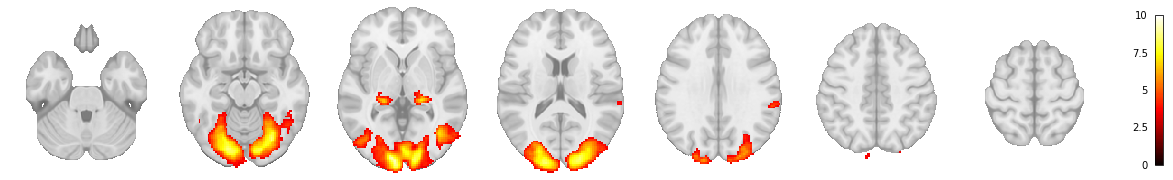

In [39]:
scrambled_z_fig = plotting.plot_stat_map(scrambled_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)

scrambled_z_fig.savefig(plot_dir / 'scrambled_z_fig')

Ghost > baseline

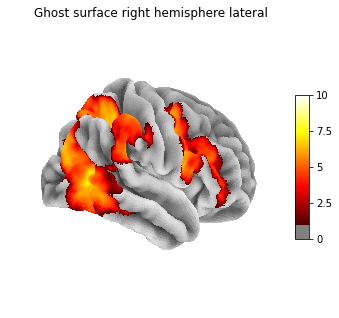

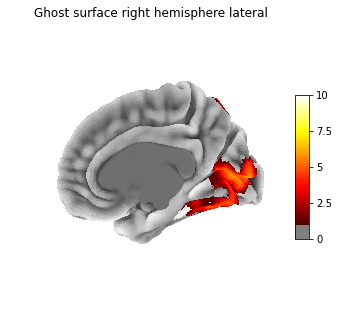

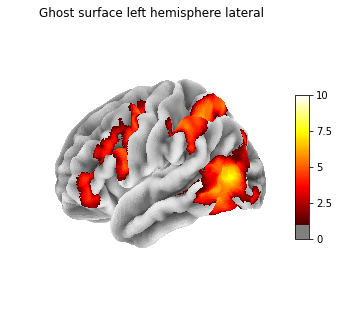

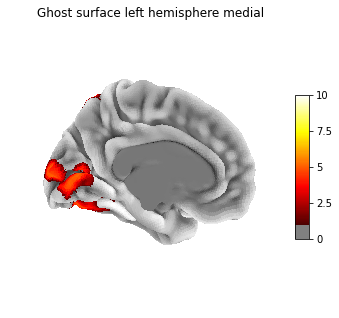

In [40]:
# sample the stat maps around freesurfer mesh
ghost_texture_r = surface.vol_to_surf(ghost_thresholded_map, fsaverage.pial_right)
ghost_texture_l = surface.vol_to_surf(ghost_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
ghost_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_right, ghost_texture_r, hemi='right', view='lateral', 
    title='Ghost surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
ghost_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_right, ghost_texture_r, hemi='right', view='medial', 
    title='Ghost surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
# left hemi
ghost_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_left, ghost_texture_l, hemi='left', view='lateral',
    title='Ghost surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)
ghost_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_left, ghost_texture_l, hemi='left', view='medial',
    title='Ghost surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)

# show the figures
ghost_texture_fig_right_lateral.show()
ghost_texture_fig_right_medial.show()
ghost_texture_fig_left_lateral.show()
ghost_texture_fig_left_medial.show()

# save the figures locally
ghost_texture_fig_right_lateral.savefig(plot_dir / 'ghost_texture_fig_right_lateral')
ghost_texture_fig_right_medial.savefig(plot_dir / 'ghost_texture_fig_right_medial')
ghost_texture_fig_left_lateral.savefig(plot_dir / 'ghost_texture_fig_left_lateral')
ghost_texture_fig_left_medial.savefig(plot_dir / 'ghost_texture_fig_left_medial')

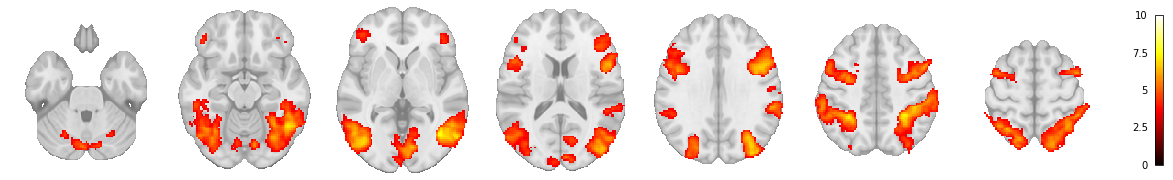

In [41]:
ghost_z_fig = plotting.plot_stat_map(ghost_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)

ghost_z_fig.savefig(plot_dir / 'ghost_z_fig')

## Figure 3 (Glass Brain)

1.	Transitive > Intransitive
2.	Intransitive > Transitive
3.	Human > Dog
3.	Dog > Human

/usr/local/lib/python3.8/dist-packages/nilearn/plotting/displays/_slicers.py:382: UserWarning: empty mask
  get_mask_bounds(new_img_like(img, not_mask, affine))


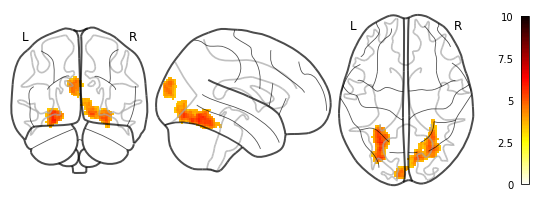

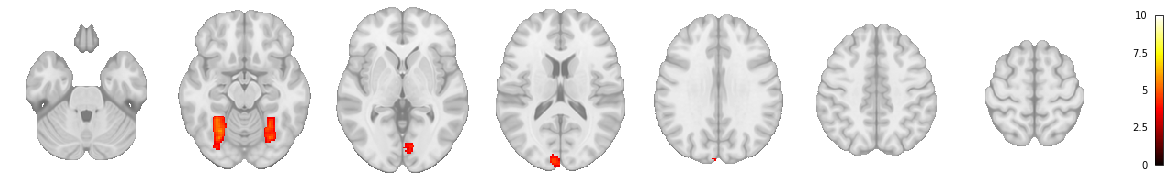

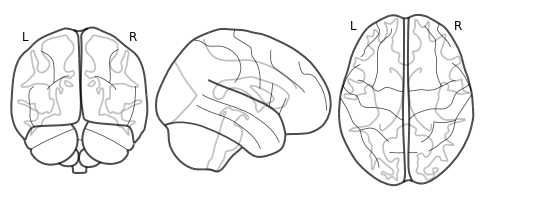

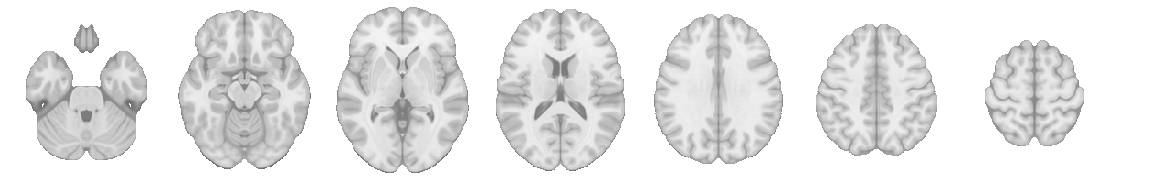

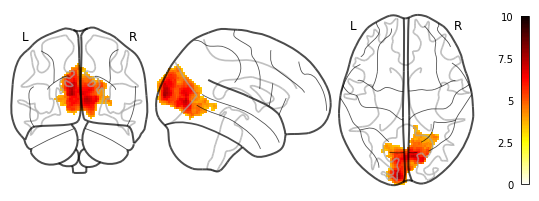

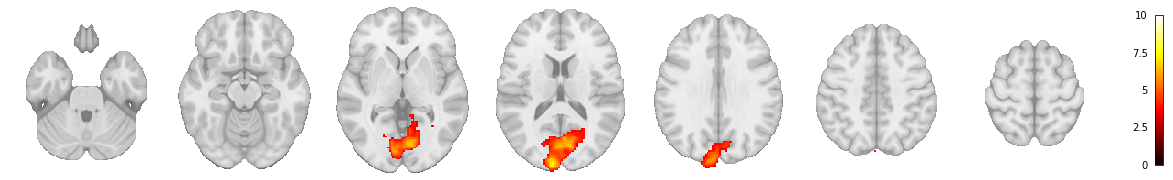

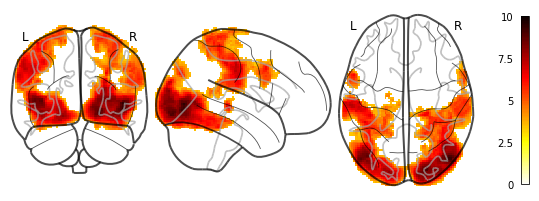

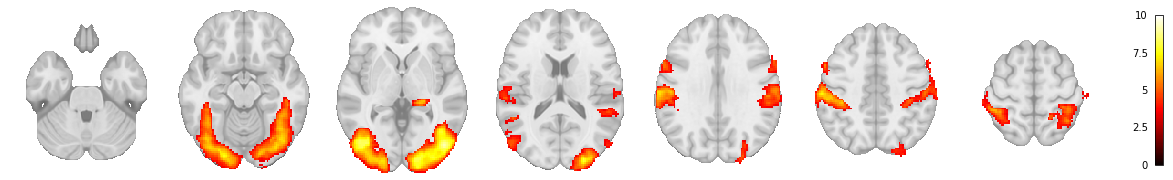

In [42]:
# transitive-intransitive
transitive_intransitive_glass_brain = plotting.plot_glass_brain(transitive_intransitive_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
transitive_intransitive_glass_brain.savefig(plot_dir / 'transitive_intransitive_glass_brain')

transitive_intransitive_z_fig = plotting.plot_stat_map(transitive_intransitive_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)
transitive_intransitive_z_fig.savefig(plot_dir / 'transitive_intransitive_z_fig')

# intransitive-transitive
intransitive_transitive_glass_brain = plotting.plot_glass_brain(intransitive_transitive_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
intransitive_transitive_glass_brain.savefig(plot_dir / 'intransitive_transitive_glass_brain')

intransitive_transitive_z_fig = plotting.plot_stat_map(intransitive_transitive_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)
intransitive_transitive_z_fig.savefig(plot_dir / 'intransitive_transitive_z_fig')

# human-dog
human_dog_glass_brain = plotting.plot_glass_brain(human_dog_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
human_dog_glass_brain.savefig(plot_dir / 'human-dog_glass_brain')

human_dog_z_fig = plotting.plot_stat_map(human_dog_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)
human_dog_z_fig.savefig(plot_dir / 'human_dog_z_fig')

# dog-human
dog_human_glass_brain = plotting.plot_glass_brain(dog_human_thresholded_map, draw_cross=False, black_bg=False, colorbar=True, vmax=10)
dog_human_glass_brain.savefig(plot_dir / 'dog_human_glass_brain')

dog_human_z_fig = plotting.plot_stat_map(dog_human_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmax=10, annotate=False)
dog_human_z_fig.savefig(plot_dir / 'dog_human_z_fig')

## Figure 4: Conjunctions

### AON x Action Processing Regions Conjunction

1.	All action > baseline 
2.	All action > baseline
3. Conjunction mask
4. Anatomical ROI mask 

In [60]:
# load some relevant brain masks
aon_mask = f"{masks_templates_dir}/AON_mask.nii.gz"
action_mask = f"{masks_templates_dir}/action_mask.nii.gz"
conjunction_mask = f"{masks_templates_dir}/conjunction_mask.nii.gz"
anat_roi_mask = f"{roi_dir}/anat_roi_mask.nii.gz"

All action > baseline

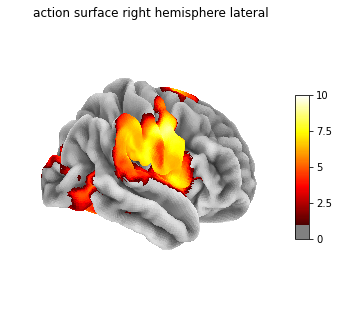

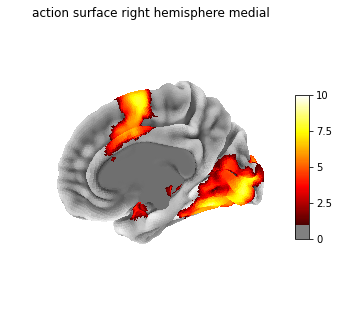

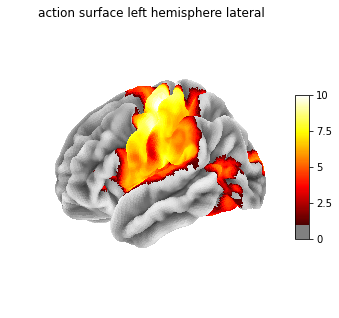

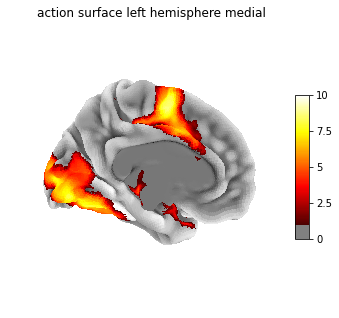

In [61]:
# sample the stat maps around freesurfer mesh
action_texture_r = surface.vol_to_surf(action_thresholded_map, fsaverage.pial_right)
action_texture_l = surface.vol_to_surf(action_thresholded_map, fsaverage.pial_left)

## create the plots
# right hemi
action_texture_fig_right_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_right, action_texture_r, hemi='right', view='lateral',
    title='action surface right hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)
action_texture_fig_right_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_right, action_texture_r, hemi='right', view='medial',
    title='action surface right hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_right,
)

# left hemi
action_texture_fig_left_lateral = plotting.plot_surf_stat_map(
    fsaverage.pial_left, action_texture_l, hemi='left', view='lateral',
    title='action surface left hemisphere lateral', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)
action_texture_fig_left_medial = plotting.plot_surf_stat_map(
    fsaverage.pial_left, action_texture_l, hemi='left', view='medial',
    title='action surface left hemisphere medial', colorbar=True, vmax=10,
    threshold=1., bg_map=curv_left,
)

# show the figures
action_texture_fig_right_lateral.show()
action_texture_fig_right_medial.show()
action_texture_fig_left_lateral.show()
action_texture_fig_left_medial.show()

# save the figures locally
action_texture_fig_right_lateral.savefig(plot_dir / 'action_texture_fig_right_lateral')
action_texture_fig_right_medial.savefig(plot_dir / 'action_texture_fig_right_medial')
action_texture_fig_left_lateral.savefig(plot_dir / 'action_texture_fig_left_lateral')
action_texture_fig_left_medial.savefig(plot_dir / 'action_texture_fig_left_medial')

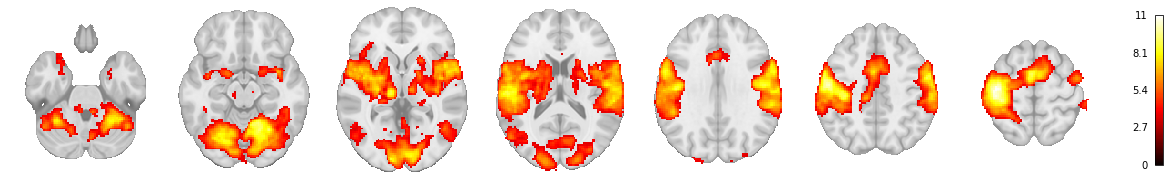

In [62]:
action_z_fig = plotting.plot_stat_map(action_thresholded_map, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, annotate=False)
action_z_fig.savefig(plot_dir / 'action_z_fig')

Conjunction action observation * action execution

I multiply the action mask by two, so that instead of one its values are 0,2 (still binary). 

In [63]:
action_mask_two = math_img("img*2", img=action_mask)

In [64]:
# quick manipulation check
action_mask_two_labels = np.unique(action_mask_two.get_fdata())
n_values_act = action_mask_two_labels.size

print(f"There are {n_values_act} different values in the mask! Check here if the mask is binary (should be 0 and 2): {action_mask_two_labels}")

There are 2 different values in the mask! Check here if the mask is binary (should be 0 and 2): [0. 2.]


Now add up the action_mask_two and the aon_mask.

This results in a final mask with the following values:
- 0 = no significant activation
- 1 = significant AON activation (violet)
- 2 = significant action activation (green)
- 3 = overlap between signficant action and AON activation (yellow)

In [113]:
conjuction_plot_mask = math_img("img1+img2", img1=aon_mask, img2=action_mask_two)

In [114]:
# quick manipulation check
conjuction_plot_mask_labels = np.unique(conjuction_plot_mask.get_fdata())
n_values_con = conjuction_plot_mask_labels.size

print(f"There are {n_values_con} different values in the mask! Check here if the mask has four discrete values (should be 0,1,2,3): {conjuction_plot_mask_labels}")

There are 4 different values in the mask! Check here if the mask has four discrete values (should be 0,1,2,3): [0. 1. 2. 3.]


/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


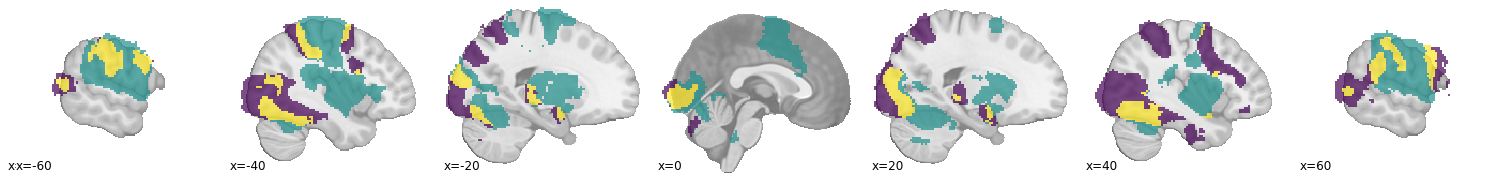

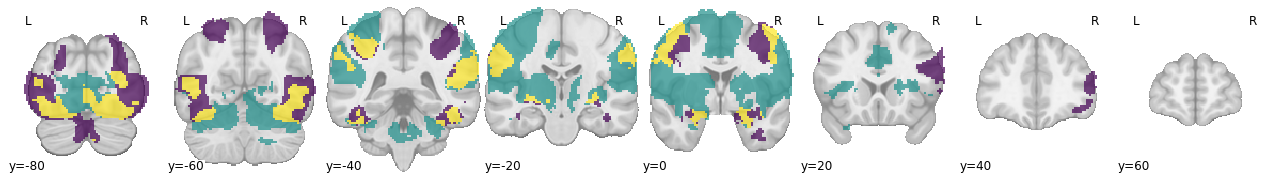

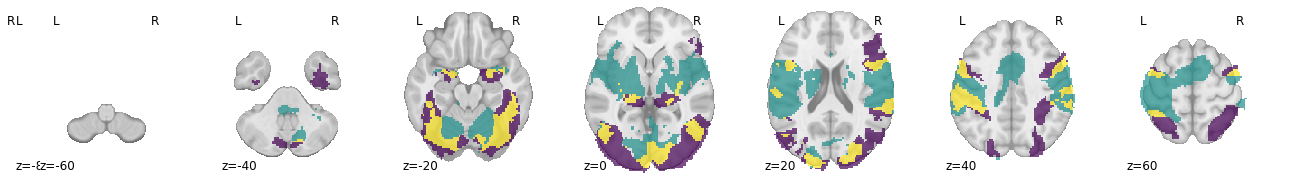

In [115]:
plotting.plot_roi(conjuction_plot_mask, display_mode = 'x', cut_coords=np.arange(-80,80,20), draw_cross=False,
                       bg_img = template, cmap="viridis", black_bg = False, alpha=.7)
plotting.plot_roi(conjuction_plot_mask, display_mode = 'y', cut_coords=np.arange(-80,80,20), draw_cross=False,
                       bg_img = template, cmap="viridis", black_bg = False, alpha=.7)
plotting.plot_roi(conjuction_plot_mask, display_mode = 'z', cut_coords=np.arange(-80,80,20), draw_cross=False,
                       bg_img = template, cmap="viridis", black_bg = False, alpha=.7)

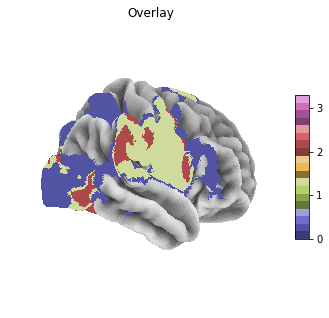

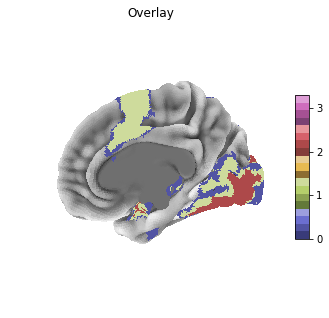

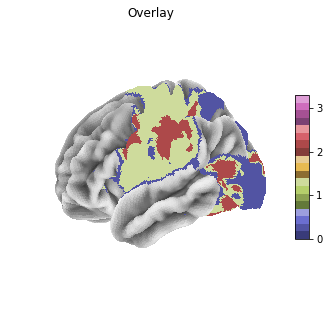

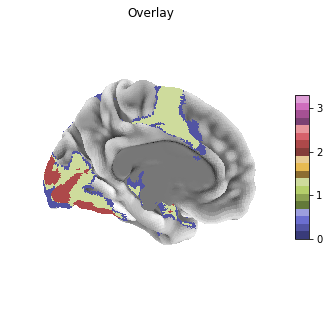

In [116]:
conjunction_texture_r = surface.vol_to_surf(conjuction_plot_mask, fsaverage.pial_right)
conjunction_texture_r = np.rint(conjunction_texture_r)
conjunction_texture_l = surface.vol_to_surf(conjuction_plot_mask, fsaverage.pial_left)
conjunction_texture_l = np.rint(conjunction_texture_l)

conjunction_texture_right_lateral = plotting.plot_surf_roi(fsaverage.pial_right, roi_map=conjunction_texture_r,
                       hemi='right', view='lateral', colorbar=True,
                       bg_map=curv_right, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)
conjunction_texture_right_medial = plotting.plot_surf_roi(fsaverage.pial_right, roi_map=conjunction_texture_r,
                       hemi='right', view='medial', colorbar=True,
                       bg_map=curv_right, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)
conjunction_texture_left_lateral = plotting.plot_surf_roi(fsaverage.pial_left, roi_map=conjunction_texture_l,
                       hemi='left', view='lateral', colorbar=True,
                       bg_map=curv_left, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)
conjunction_texture_left_medial = plotting.plot_surf_roi(fsaverage.pial_left, roi_map=conjunction_texture_l,
                       hemi='left', view='medial', colorbar=True,
                       bg_map=curv_left, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)



conjunction_texture_right_lateral.show()
conjunction_texture_left_lateral.show()
conjunction_texture_right_medial.show()
conjunction_texture_left_medial.show()

conjunction_texture_right_lateral.savefig(plot_dir / 'conjunction_texture_fig_right_lateral')
conjunction_texture_left_lateral.savefig(plot_dir / 'conjunction_texture_fig_left_lateral')
conjunction_texture_right_medial.savefig(plot_dir / 'conjunction_texture_fig_right_medial')
conjunction_texture_left_medial.savefig(plot_dir / 'conjunction_texture_fig_left_medial')

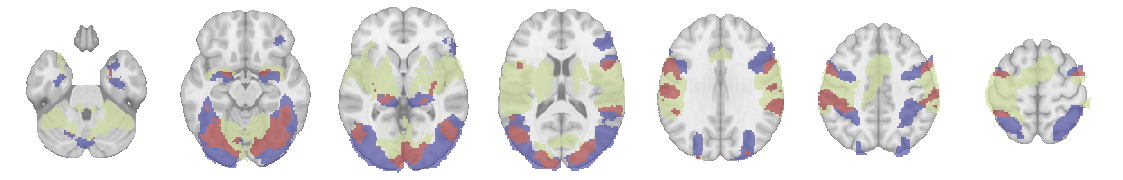

In [117]:
conjunction_z_fig = plotting.plot_roi(conjuction_plot_mask, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmin=0.8, vmax=4.1, cmap="tab20b", annotate=False)
conjunction_z_fig.savefig(plot_dir / 'conjunction_z_fig')

### AON x Feature Processing Region Conjunction

In [51]:
fp_mask = f"{masks_templates_dir}/both_combined_binary.nii"
fp_mask = nib.load(fp_mask)

/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


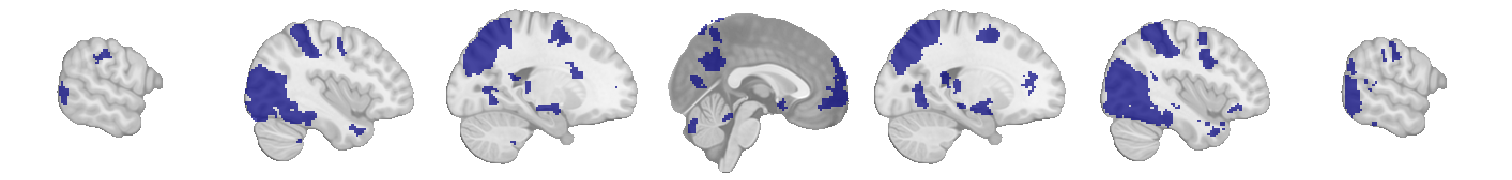

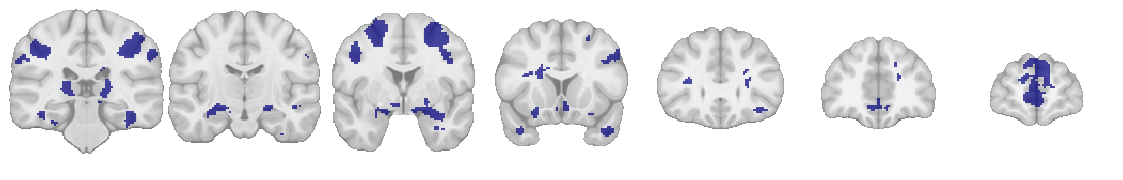

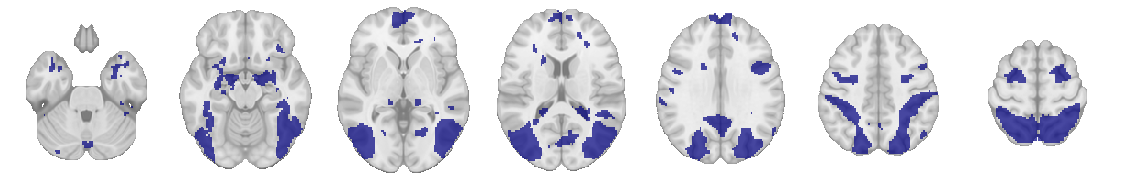

In [56]:
fp_plot = plotting.plot_roi(fp_mask, display_mode = 'x', cut_coords=np.arange(-80,80,20), draw_cross=False,
                                    bg_img = template, black_bg=False, annotate=False)

plotting.plot_roi(fp_mask, display_mode = 'y', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, annotate=False)

plotting.plot_roi(fp_mask, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, annotate=False)

Overlap between action observation task activation (blue) and feature processing regions (yellow)

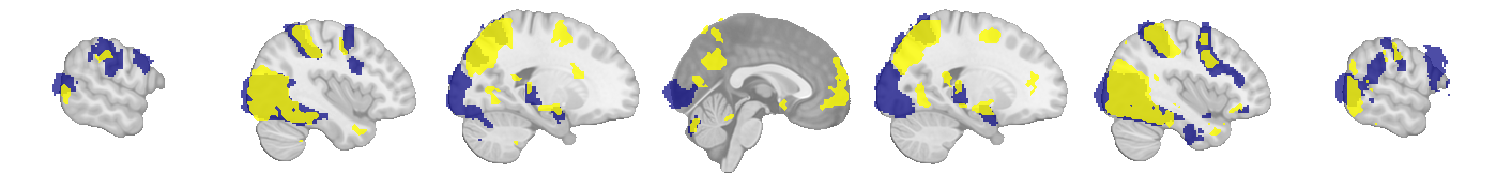

In [59]:
aon_plot = plotting.plot_roi(aon_mask, display_mode = 'x', cut_coords=np.arange(-80,80,20), draw_cross=False,
                                    bg_img = template, black_bg=False, annotate=False)
aon_plot.add_contours(fp_mask, filled=True, alpha=0.8, colors="yellow")

I multiply the fp mask by two, so that instead of one its values are 0,2 (still binary). 

In [65]:
fp_mask_two = math_img("img*2", img=fp_mask)

In [ ]:
# quick manipulation check
fp_mask_two_labels = np.unique(fp_mask_two.get_fdata())
n_values_act = fp_mask_two_labels.size

print(f"There are {n_values_act} different values in the mask! Check here if the mask is binary (should be 0 and 2): {fp_mask_two_labels}")

Now add up the action_mask_two and the aon_mask.

This results in a final mask with the following values:
- 0 = no significant activation
- 1 = significant AON activation (violet)
- 2 = significant action activation (green)
- 3 = overlap between signficant action and AON activation (yellow)

In [113]:
conjuction_plot_mask = math_img("img1+img2", img1=aon_mask, img2=action_mask_two)

In [114]:
# quick manipulation check
conjuction_plot_mask_labels = np.unique(conjuction_plot_mask.get_fdata())
n_values_con = conjuction_plot_mask_labels.size

print(f"There are {n_values_con} different values in the mask! Check here if the mask has four discrete values (should be 0,1,2,3): {conjuction_plot_mask_labels}")

There are 4 different values in the mask! Check here if the mask has four discrete values (should be 0,1,2,3): [0. 1. 2. 3.]


/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


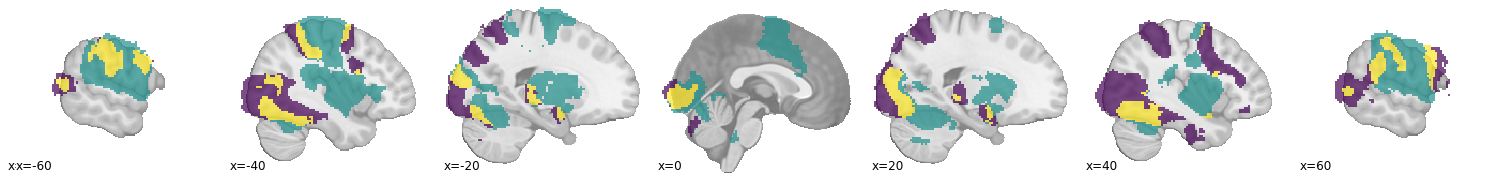

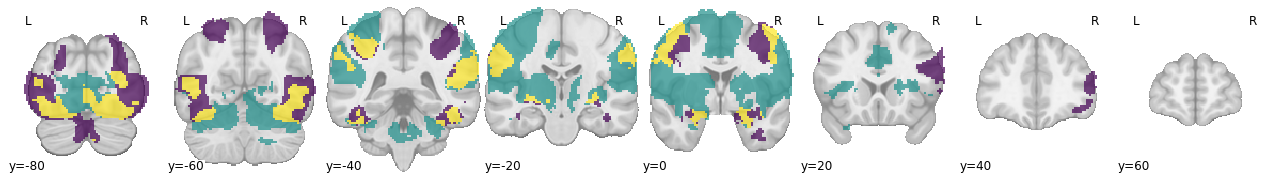

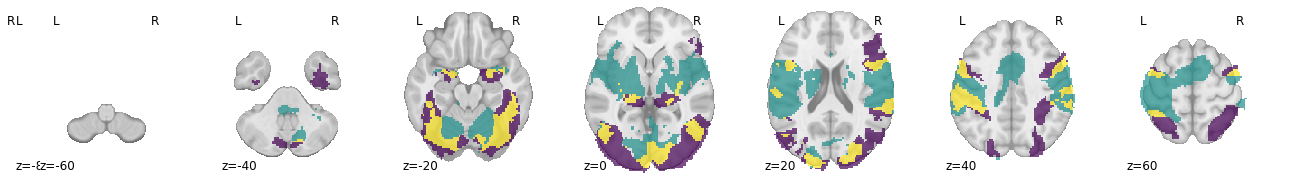

In [115]:
plotting.plot_roi(conjuction_plot_mask, display_mode = 'x', cut_coords=np.arange(-80,80,20), draw_cross=False,
                       bg_img = template, cmap="viridis", black_bg = False, alpha=.7)
plotting.plot_roi(conjuction_plot_mask, display_mode = 'y', cut_coords=np.arange(-80,80,20), draw_cross=False,
                       bg_img = template, cmap="viridis", black_bg = False, alpha=.7)
plotting.plot_roi(conjuction_plot_mask, display_mode = 'z', cut_coords=np.arange(-80,80,20), draw_cross=False,
                       bg_img = template, cmap="viridis", black_bg = False, alpha=.7)

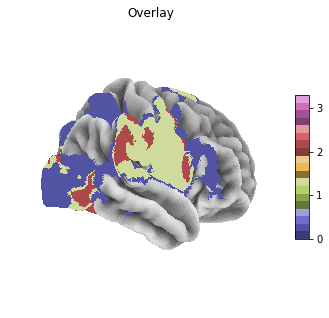

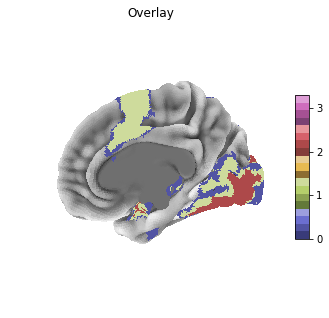

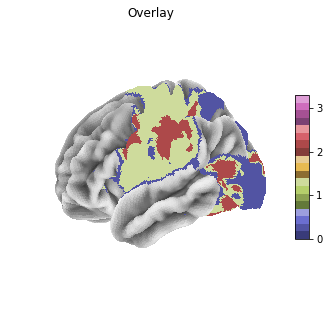

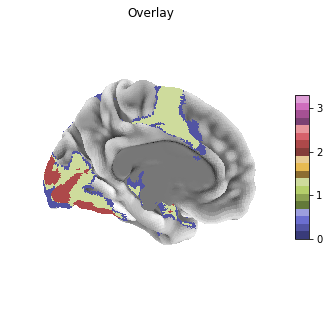

In [116]:
conjunction_texture_r = surface.vol_to_surf(conjuction_plot_mask, fsaverage.pial_right)
conjunction_texture_r = np.rint(conjunction_texture_r)
conjunction_texture_l = surface.vol_to_surf(conjuction_plot_mask, fsaverage.pial_left)
conjunction_texture_l = np.rint(conjunction_texture_l)

conjunction_texture_right_lateral = plotting.plot_surf_roi(fsaverage.pial_right, roi_map=conjunction_texture_r,
                       hemi='right', view='lateral', colorbar=True,
                       bg_map=curv_right, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)
conjunction_texture_right_medial = plotting.plot_surf_roi(fsaverage.pial_right, roi_map=conjunction_texture_r,
                       hemi='right', view='medial', colorbar=True,
                       bg_map=curv_right, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)
conjunction_texture_left_lateral = plotting.plot_surf_roi(fsaverage.pial_left, roi_map=conjunction_texture_l,
                       hemi='left', view='lateral', colorbar=True,
                       bg_map=curv_left, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)
conjunction_texture_left_medial = plotting.plot_surf_roi(fsaverage.pial_left, roi_map=conjunction_texture_l,
                       hemi='left', view='medial', colorbar=True,
                       bg_map=curv_left, bg_on_data=False,
                       title="Overlay", cmap="tab20b", vmin=0.8, vmax=4.1)



conjunction_texture_right_lateral.show()
conjunction_texture_left_lateral.show()
conjunction_texture_right_medial.show()
conjunction_texture_left_medial.show()

conjunction_texture_right_lateral.savefig(plot_dir / 'conjunction_texture_fig_right_lateral')
conjunction_texture_left_lateral.savefig(plot_dir / 'conjunction_texture_fig_left_lateral')
conjunction_texture_right_medial.savefig(plot_dir / 'conjunction_texture_fig_right_medial')
conjunction_texture_left_medial.savefig(plot_dir / 'conjunction_texture_fig_left_medial')

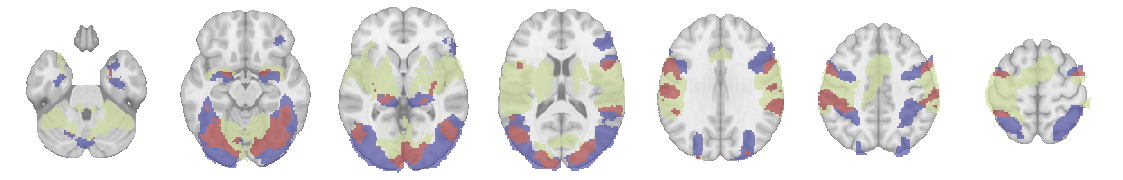

In [117]:
conjunction_z_fig = plotting.plot_roi(conjuction_plot_mask, display_mode = 'z', cut_coords=np.arange(-30,61,15), draw_cross=False,
                                    bg_img = template, black_bg=False, vmin=0.8, vmax=4.1, cmap="tab20b", annotate=False)
conjunction_z_fig.savefig(plot_dir / 'conjunction_z_fig')

### Figure 5: Regions of Interest

**Action ROIs**

- Left IPL AON mask
- Right IPL AON mask
- Left IFG AON mask
- Right IFG AON mask
- Left PM AON mask
- Right PM AON mask
- Left M1 AON mask
- Left S1 AON mask
- Right S1 AON mask
- Left S2 AON mask
- Right S2 AON mask

In [68]:
# all ao anatomical regions
all_aon_anat = f"{roi_dir}/anat_roi_mask.nii.gz"

# action processing region masks
left_ipl = f"{roi_dir}/left_ipl_aon_mask.nii.gz"
right_ipl = f"{roi_dir}/right_ipl_aon_mask.nii.gz"
left_ifg = f"{roi_dir}/left_ifg_aon_mask.nii.gz"
right_ifg = f"{roi_dir}/right_ifg_aon_mask.nii.gz"
left_pm = f"{roi_dir}/left_pm_aon_mask.nii.gz"
right_pm = f"{roi_dir}/right_pm_aon_mask.nii.gz"
left_m1 = f"{roi_dir}/left_m1_aon_mask.nii.gz"
left_s1 = f"{roi_dir}/left_s1_aon_mask.nii.gz"
right_s1 = f"{roi_dir}/right_s1_aon_mask.nii.gz"
left_s2 = f"{roi_dir}/left_s2_aon_mask.nii.gz"
right_s2 = f"{roi_dir}/right_s2_aon_mask.nii.gz"

**Agent (Face Body) ROIs**

- Left LOC FB mask
- Right LOC FB mask
- Left Fusiform Cortex FB mask
- Right Fusiform Cortex FB mask
- Left V5 FB mask
- Right V5 FB mask
- Left pSTS FB mask
- Right pSTS FB mask


In [69]:
# all fb anatomical regions
all_fb_anat = f"{roi_dir}/fb_anat_roi_mask.nii.gz"

# feature processing region masks
left_loc = f"{roi_dir}/left_loc_fb_mask.nii.gz"
right_loc = f"{roi_dir}/right_loc_fb_mask.nii.gz"
left_fusiform = f"{roi_dir}/left_fusiform_cortex_fb_mask.nii.gz"
right_fusiform = f"{roi_dir}/right_fusiform_cortex_fb_mask.nii.gz"
left_v5 = f"{roi_dir}/left_v5_fb_mask.nii.gz"
right_v5 = f"{roi_dir}/right_v5_fb_mask.nii.gz"
left_pSTS = f"{roi_dir}/left_pSTS_fb_mask.nii.gz"
right_pSTS = f"{roi_dir}/right_pSTS_fb_mask.nii.gz"

In [70]:
all_masks = [left_ipl, right_ipl,
             left_ifg, right_ifg,
             left_pm, right_pm,
             left_m1,
             left_s1, right_s1,
             left_s2, right_s2,
             left_loc, right_loc,
             left_fusiform, right_fusiform,
             left_v5, right_v5,
             left_pSTS, right_pSTS]

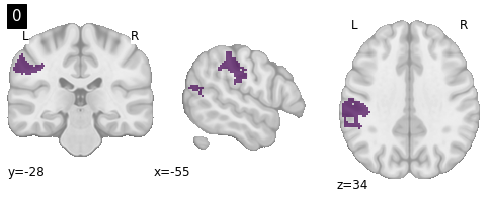

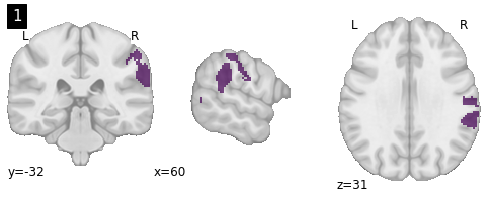

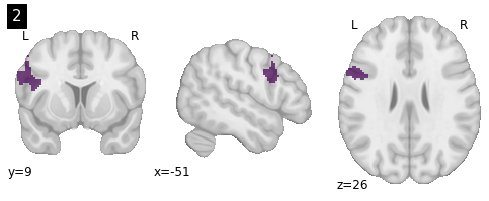

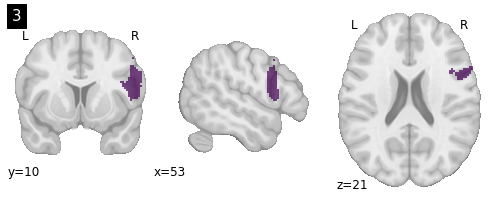

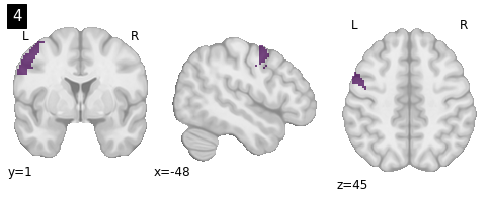

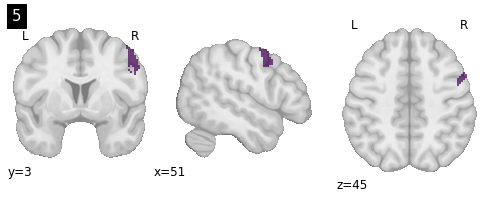

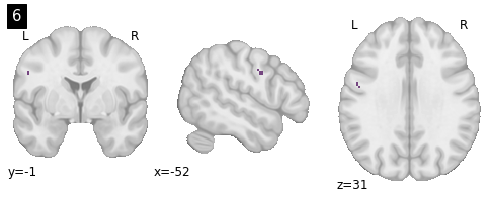

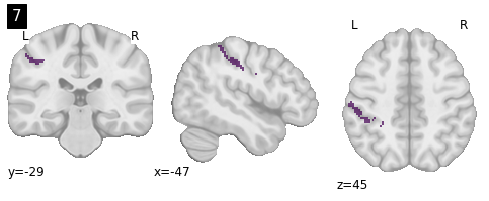

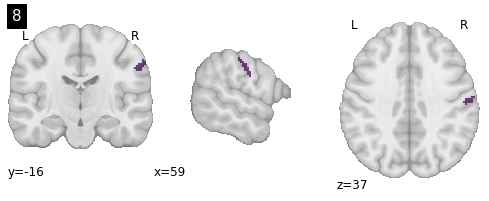

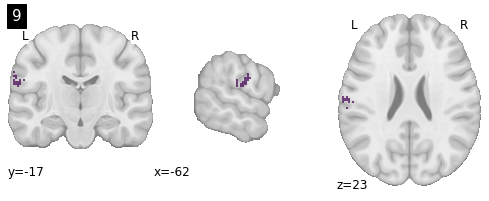

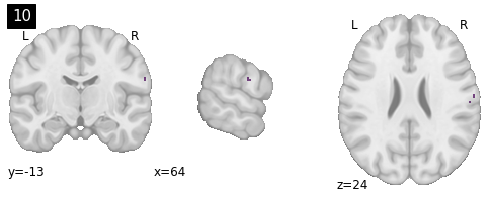

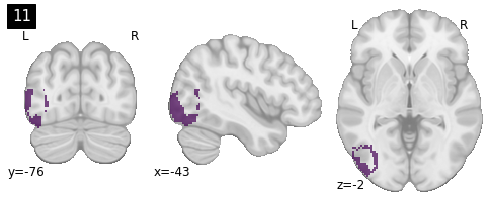

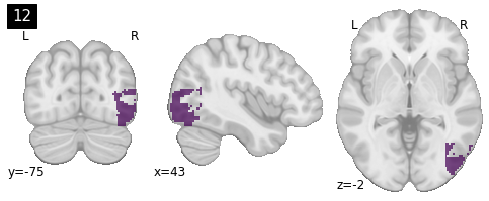

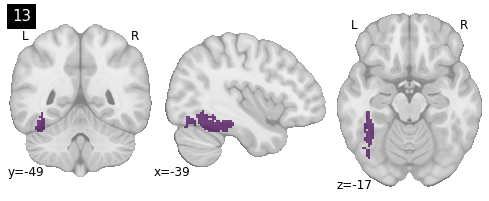

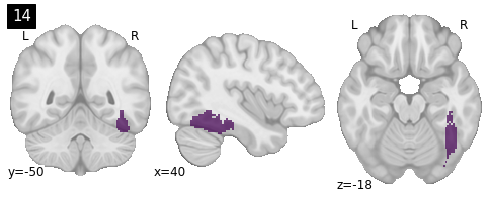

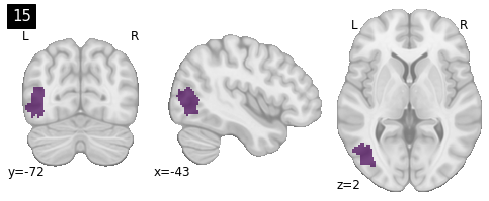

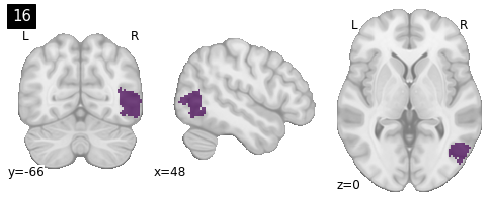

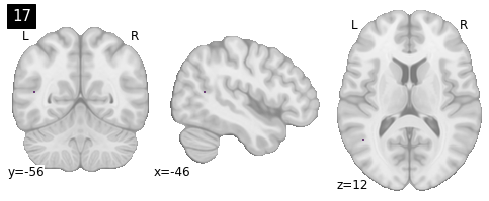

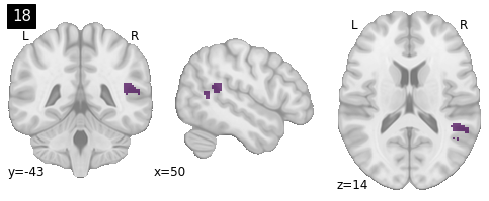

In [71]:
# plot them all
for idx, mask in enumerate(all_masks):
    plotting.plot_roi(mask, title=idx, draw_cross=False, bg_img=template, black_bg=False, cmap="viridis")

Combine them 
- IPL = 1
- IFG = 2
- PM = 3
- M1 = 4
- S1 = 5
- S2 = 6
- LOC = 7
- FUSIFORM = 8
- V5 = 9
- pSTS = 10 

In [72]:
labels = {1:"IPL",
          2:"IFG",
          3:"PM",
          4:"M1",
          5:"S1",
          6:"S2",
          7:"LOC",
          8:"FUSIFORM",
          9:"Area V5",
          10:"pSTS"}

In [73]:
ipl_total = math_img("img1+img2", img1=left_ipl, img2=right_ipl)

ifg_total = math_img("img1+img2", img1=left_ifg, img2=right_ifg)
ifg_total_two = math_img("img*2", img=ifg_total)

pm_total = math_img("img1+img2", img1=left_pm, img2=right_pm)
pm_total_three = math_img("img*3", img = pm_total)

m1_total = nib.load(left_m1)
m1_total_four = math_img("img*4", img = left_m1)

s1_total = math_img("img1+img2", img1=left_s1, img2=right_s1)
s1_total_five = math_img("np.round((img*5),decimals=0)", img = s1_total)

s2_total = math_img("img1+img2", img1=left_s2, img2=right_s2)
s2_total_six = math_img("img*6", img = s2_total)

loc_total = math_img("img1+img2", img1=left_loc, img2=right_loc)
loc_total_seven = math_img("np.round((img*7),decimals=0)", img = loc_total)

fusiform_total = math_img("img1+img2", img1=left_fusiform, img2=right_fusiform)
fusiform_total_eight = math_img("np.round((img*8),decimals=0)", img = fusiform_total)

v5_total = math_img("img1+img2", img1=left_v5, img2=right_v5)
v5_total_nine = math_img("np.round((img*9),decimals=0)", img = v5_total)

pSTS_total = math_img("img1+img2", img1=left_pSTS, img2=right_pSTS)
pSTS_total_ten = math_img("np.round((img*10),decimals=0)", img = pSTS_total)

# and add them up
roi_atlas = math_img("img1+img2+img3+img4+img5+img6+img7+img8+img9+img10", 
                     img1=ipl_total, 
                     img2=ifg_total_two, 
                     img3=pm_total_three, 
                     img4=m1_total_four,
                     img5=s1_total_five,
                     img6=s2_total_six,
                     img7=loc_total_seven,
                     img8=fusiform_total_eight,
                     img9=v5_total_nine,
                     img10=pSTS_total_ten)

In [74]:
# quick sanity check
roi_int_labels = np.unique(roi_atlas.get_fdata())
n_regions = roi_int_labels.size

print(f"There are {n_regions} different regions in the mask! Check here if the mask has eleven discrete values: {roi_int_labels}")

There are 11 different regions in the mask! Check here if the mask has eleven discrete values: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


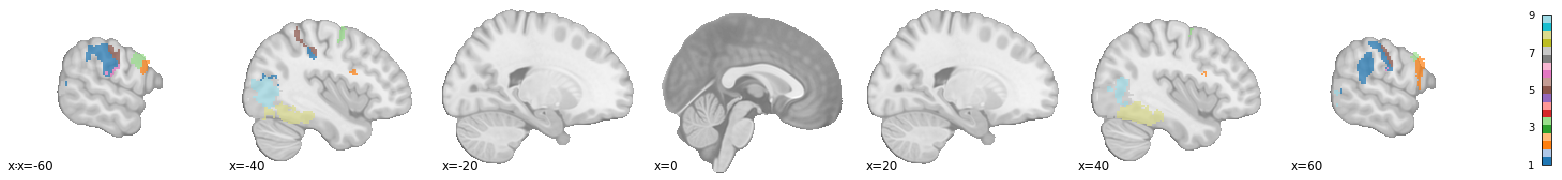

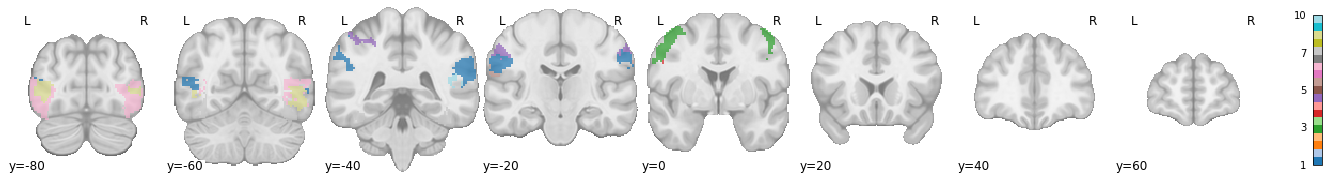

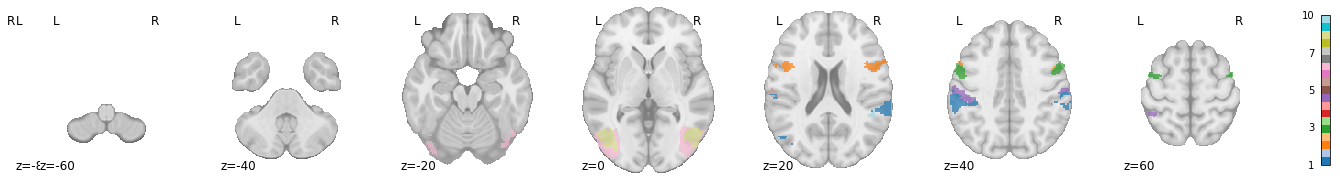

In [75]:
roi_plot_x = plotting.plot_roi(roi_atlas, display_mode = 'x', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20", colorbar=True)

roi_plot_y = plotting.plot_roi(roi_atlas, display_mode = 'y', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20", colorbar=True)

roi_plot_z = plotting.plot_roi(roi_atlas, display_mode = 'z', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20", colorbar=True)

In [76]:
# save the stuff
roi_atlas_path = f"{roi_dir}/all_rois_mask.nii.gz"
roi_atlas.to_filename(roi_atlas_path)

**Do the same but just with the total FB and total AON masks**

In [77]:
fb_two = math_img("np.round((img*2), decimals=0)", img=all_fb_anat)

In [78]:
fb_ao_combined = math_img("np.round((img1+img2), decimals=0)", img1=all_aon_anat, img2=fb_two)

In [79]:
# quick sanity check
fb_ao_int_labels = np.unique(fb_ao_combined.get_fdata())
n_regions = fb_ao_int_labels.size

print(f"There are {n_regions} different regions in the mask! Check here if the mask has two discrete values: {fb_ao_int_labels}")

There are 4 different regions in the mask! Check here if the mask has two discrete values: [0. 1. 2. 3.]


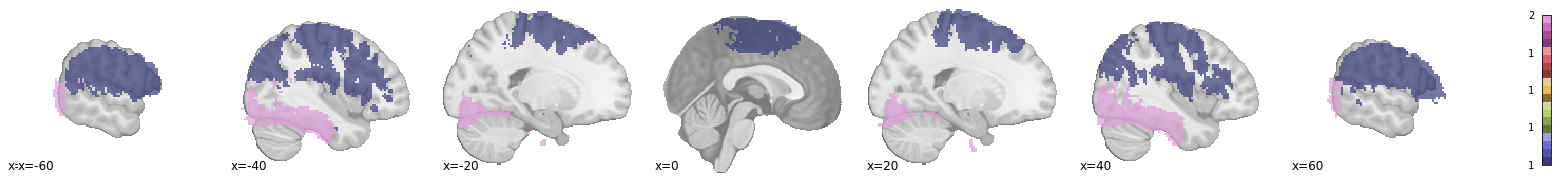

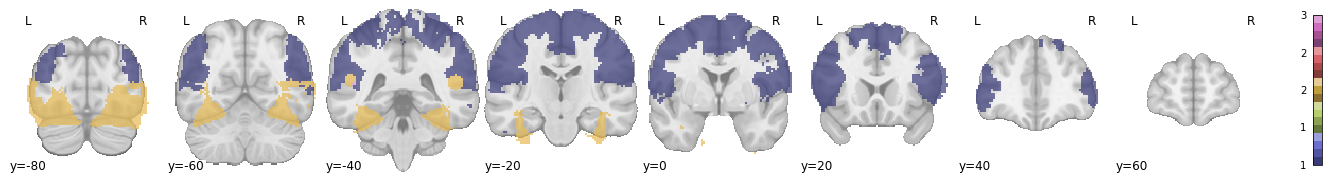

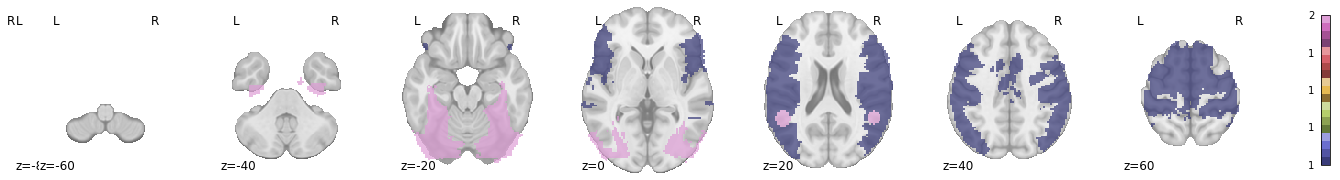

In [80]:
fb_ao_plot_x = plotting.plot_roi(fb_ao_combined, display_mode = 'x', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20b", colorbar=True)

fb_ao_plot_y = plotting.plot_roi(fb_ao_combined, display_mode = 'y', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20b", colorbar=True)

fb_ao_plot_z = plotting.plot_roi(fb_ao_combined, display_mode = 'z', cut_coords=np.arange(-80,80,20), 
                             draw_cross=False, bg_img=template, black_bg=False, cmap="tab20b", colorbar=True)

------------------


## Masking flowchart

#### 1. Binary mask action observation > baseline

In [155]:
aon_mask = f"{masks_templates_dir}/AON_mask.nii.gz"

In [156]:
## function to create medial and lateral surface plot for each hemisphere 

def MyMaskSurfacePlots(mask, colormap):
    
    ''' Creates a dictonary with lateral / medial surface plots for each hemisphere from a binary mask image.
    Inputs: mask (a nii or nii.gz mask image(
            colormap (a matplotlib colormap)
    Returns a dictionary with the plots'''
        
    texture_r = surface.vol_to_surf(mask, fsaverage.pial_right)
    texture_r = np.rint(texture_r)
    texture_l = surface.vol_to_surf(mask, fsaverage.pial_left)
    texture_l = np.rint(texture_r)
    
    
    texture_right_lateral = plotting.plot_surf_roi(fsaverage.pial_right, roi_map=texture_r,
                       hemi='right', view='lateral', colorbar=True,
                       bg_map=curv_right, bg_on_data=False,
                       title="Overlay", cmap=colormap, vmin=0.8, vmax=4.1)
    texture_right_medial = plotting.plot_surf_roi(fsaverage.pial_right, roi_map=texture_r,
                       hemi='right', view='medial', colorbar=True,
                       bg_map=curv_right, bg_on_data=False,
                       title="Overlay", cmap=colormap, vmin=0.8, vmax=4.1)
    texture_left_lateral = plotting.plot_surf_roi(fsaverage.pial_left, roi_map=texture_l,
                       hemi='left', view='lateral', colorbar=True,
                       bg_map=curv_left, bg_on_data=False,
                       title="Overlay", cmap=colormap, vmin=0.8, vmax=4.1)
    texture_left_medial = plotting.plot_surf_roi(fsaverage.pial_left, roi_map=texture_l,
                       hemi='left', view='medial', colorbar=True,
                       bg_map=curv_left, bg_on_data=False,
                       title="Overlay", cmap=colormap, vmin=0.8, vmax=4.1)
    
    # store each plot in a dict
    
    surface_plot_dict = {"texture right lateral":texture_right_lateral,
                         "texture right medial":texture_right_medial,
                         "texture left lateral":texture_left_lateral,
                         "texture left medial":texture_left_medial}
                         
    # show the plots
    
    texture_right_lateral.show()
    texture_left_lateral.show()
    texture_right_medial.show()
    texture_left_medial.show()
    
    # return the dict
    
    return surface_plot_dict
    

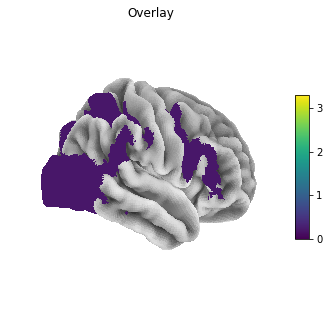

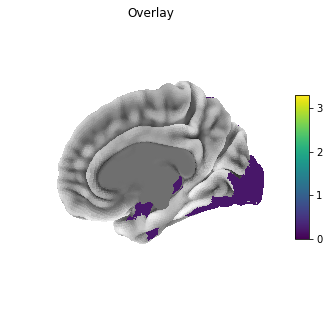

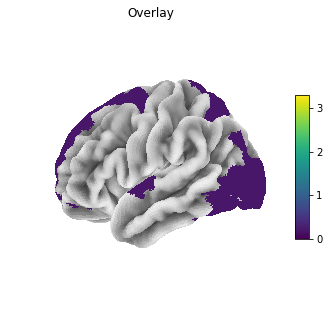

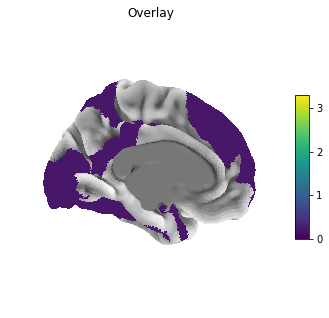

In [157]:
aon_binary_surface_plots = MyMaskSurfacePlots(aon_mask, "viridis")

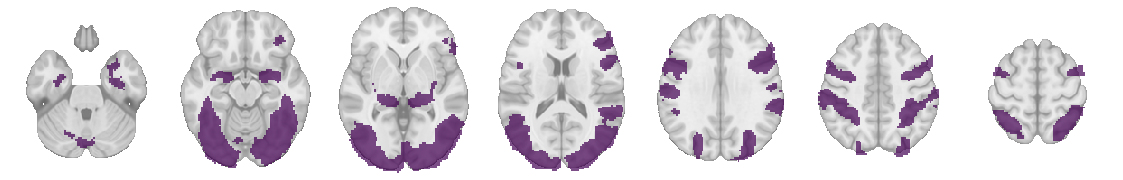

In [158]:
aon_binary_plot_z = plotting.plot_roi(aon_mask, display_mode = "z", cut_coords=np.arange(-30,61,15), cmap="viridis", annotate=False, draw_cross=False, bg_img = template, black_bg = False)

In [159]:
aon_binary_surface_plots.get('texture right lateral').savefig(plot_dir / 'aon_binary_texture_fig_right_lateral')
aon_binary_surface_plots.get('texture right medial').savefig(plot_dir / 'aon_binary_texture_fig_right_medial')
aon_binary_surface_plots.get('texture left lateral').savefig(plot_dir / 'aon_binary_texture_fig_left_lateral')
aon_binary_surface_plots.get('texture left medial').savefig(plot_dir / 'aon_binary_texture_fig_left_medial')
aon_binary_plot_z.savefig(plot_dir / 'aon_binary_z_fig')

#### 2a. Binary mask of action execution

In [160]:
action_mask = f"{masks_templates_dir}/action_mask.nii.gz"

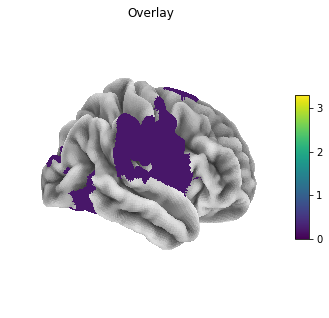

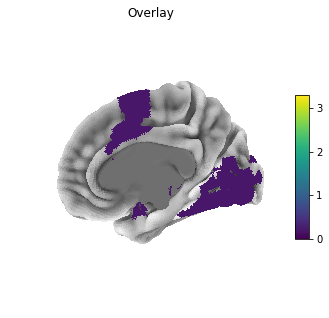

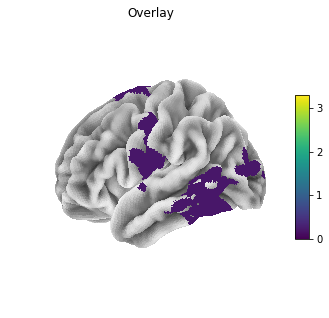

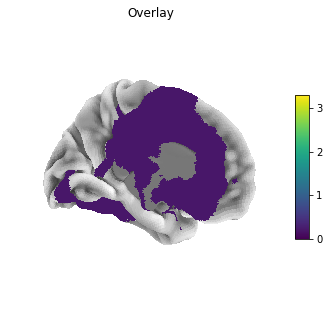

In [161]:
action_binary_surface_plots = MyMaskSurfacePlots(action_mask, "viridis")

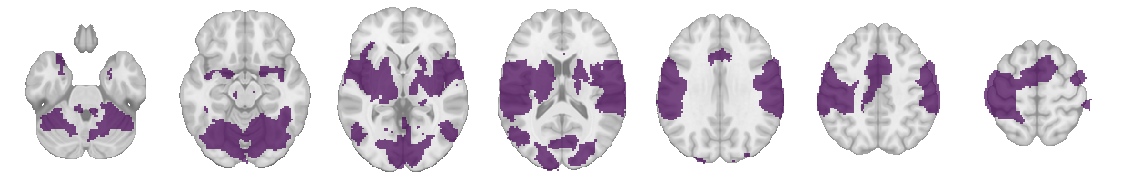

In [162]:
action_binary_plot_z = plotting.plot_roi(action_mask, display_mode = "z", cut_coords=np.arange(-30,61,15), cmap="viridis", annotate=False, draw_cross=False, bg_img = template, black_bg = False)

In [163]:
action_binary_surface_plots.get('texture right lateral').savefig(plot_dir / 'action_binary_texture_fig_right_lateral')
action_binary_surface_plots.get('texture right medial').savefig(plot_dir / 'action_binary_texture_fig_right_medial')
action_binary_surface_plots.get('texture left lateral').savefig(plot_dir / 'action_binary_texture_fig_left_lateral')
action_binary_surface_plots.get('texture left medial').savefig(plot_dir / 'action_binary_texture_fig_left_medial')
action_binary_plot_z.savefig(plot_dir / 'aon_binary_z_fig')

#### 2b. Face Body binary mask surface plot

In [164]:
fb_mask = f"{masks_templates_dir}/both_combined_binary.nii"

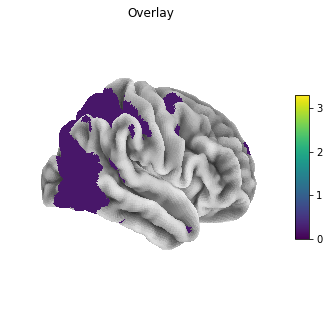

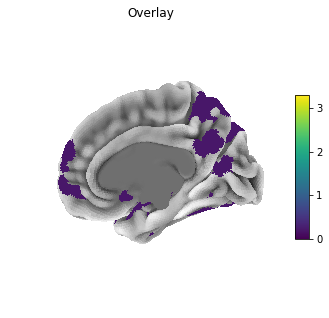

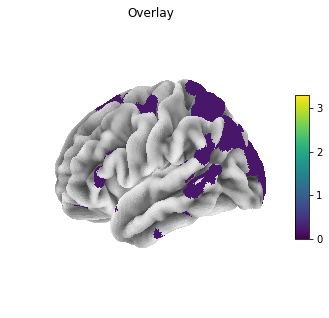

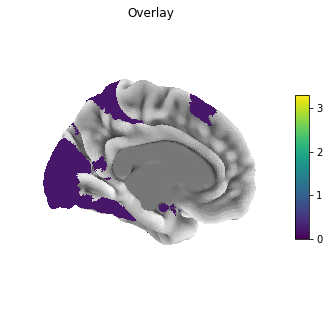

In [165]:
fb_binary_surface_plots = MyMaskSurfacePlots(fb_mask, "viridis")

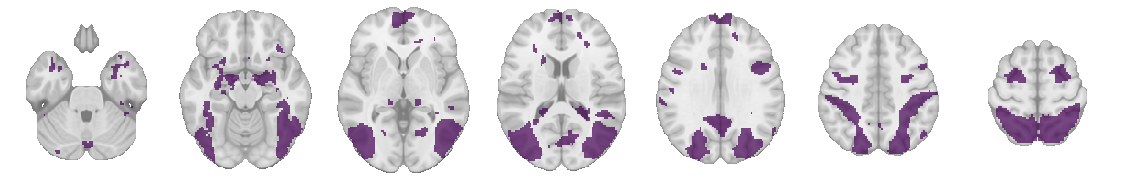

In [166]:
fb_binary_plot_z = plotting.plot_roi(fb_mask, display_mode = "z", cut_coords=np.arange(-30,61,15), cmap="viridis", annotate=False, draw_cross=False, bg_img = template, black_bg = False)

In [167]:
fb_binary_surface_plots.get('texture right lateral').savefig(plot_dir / 'fb_binary_texture_fig_right_lateral')
fb_binary_surface_plots.get('texture right medial').savefig(plot_dir / 'fb_binary_texture_fig_right_medial')
fb_binary_surface_plots.get('texture left lateral').savefig(plot_dir / 'fb_binary_texture_fig_left_lateral')
fb_binary_surface_plots.get('texture left medial').savefig(plot_dir / 'fb_binary_texture_fig_left_medial')
fb_binary_plot_z.savefig(plot_dir / 'fb_binary_z_fig')

#### 3a. Action observation x execution mask surface plot

In [168]:
act_conjunction_mask = f"{masks_templates_dir}/act_conjunction_mask.nii.gz"

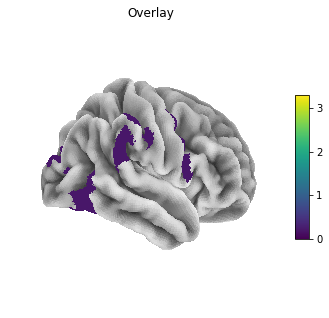

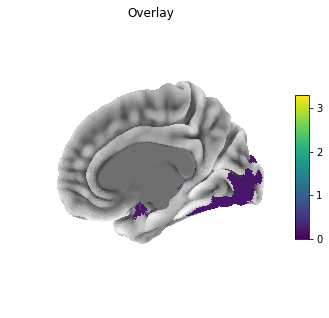

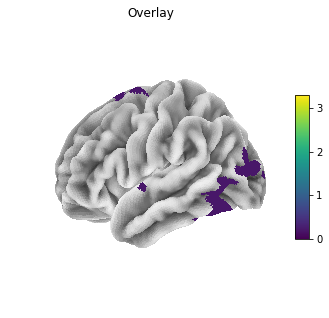

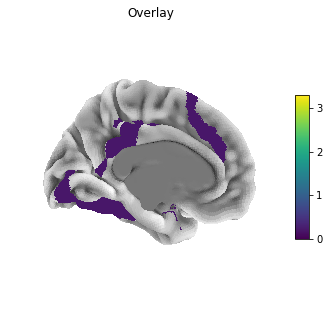

In [169]:
act_conjunction_surface_plots = MyMaskSurfacePlots(act_conjunction_mask, "viridis")

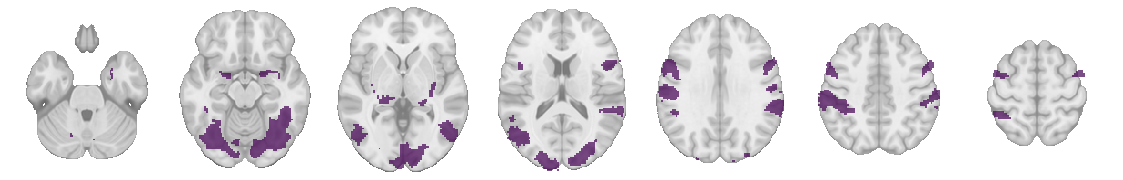

In [170]:
act_conjunction_plot_z = plotting.plot_roi(act_conjunction_mask, display_mode = "z", cut_coords=np.arange(-30,61,15), cmap="viridis", annotate=False, draw_cross=False, bg_img = template, black_bg = False)

In [171]:
act_conjunction_surface_plots.get('texture right lateral').savefig(plot_dir / 'act_conjunction_texture_fig_right_lateral')
act_conjunction_surface_plots.get('texture right medial').savefig(plot_dir / 'act_conjunction_texture_fig_right_medial')
act_conjunction_surface_plots.get('texture left lateral').savefig(plot_dir / 'act_conjunction_texture_fig_left_lateral')
act_conjunction_surface_plots.get('texture left medial').savefig(plot_dir / 'act_conjunction_texture_fig_left_medial')
act_conjunction_plot_z.savefig(plot_dir / 'act_conjunction_z_fig')

#### 3b. Action observation x face body mask surface plot

In [172]:
fp_conjunction_mask = f"{masks_templates_dir}/fp_conjunction_mask.nii.gz"

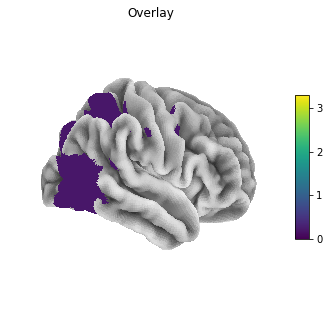

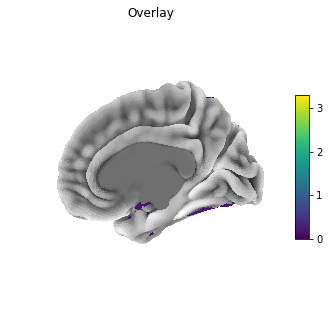

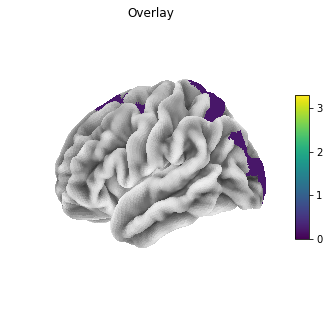

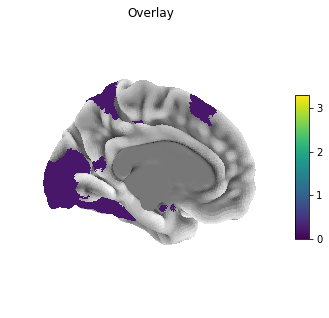

In [173]:
fp_conjunction_surface_plots = MyMaskSurfacePlots(fp_conjunction_mask, "viridis")

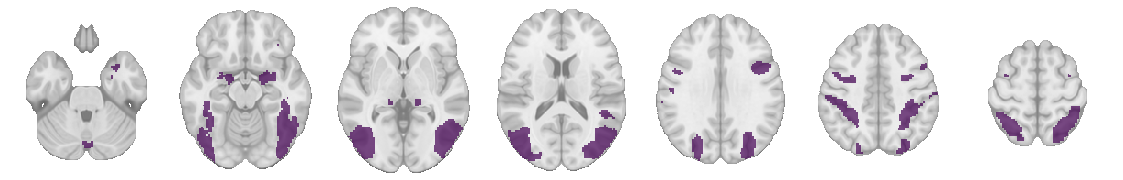

In [174]:
fp_conjunction_plot_z = plotting.plot_roi(fp_conjunction_mask, display_mode = "z", cut_coords=np.arange(-30,61,15), cmap="viridis", annotate=False, draw_cross=False, bg_img = template, black_bg = False)

In [175]:
fp_conjunction_surface_plots.get('texture right lateral').savefig(plot_dir / 'fp_conjunction_texture_fig_right_lateral')
fp_conjunction_surface_plots.get('texture right medial').savefig(plot_dir / 'fp_conjunction_texture_fig_right_medial')
fp_conjunction_surface_plots.get('texture left lateral').savefig(plot_dir / 'fp_conjunction_texture_fig_left_lateral')
fp_conjunction_surface_plots.get('texture left medial').savefig(plot_dir / 'fp_conjunction_texture_fig_left_medial')
fp_conjunction_plot_z.savefig(plot_dir / 'fp_conjunction_z_fig')

#### 4. Create the combined Anat ROI masks

In [176]:
act_roi_atlas = math_img("img1+img2+img3+img4+img5+img6", 
                     img1=ipl_total, 
                     img2=ifg_total_two, 
                     img3=pm_total_three, 
                     img4=m1_total_four,
                     img5=s1_total_five,
                     img6=s2_total_six)

fp_roi_atlas = math_img("img1+img2+img3+img4", 
                     img1=loc_total_seven,
                     img2=fusiform_total_eight,
                     img3=v5_total_nine,
                     img4=pSTS_total_ten)

#### 4a. Act conjunction x Anat ROI Plot

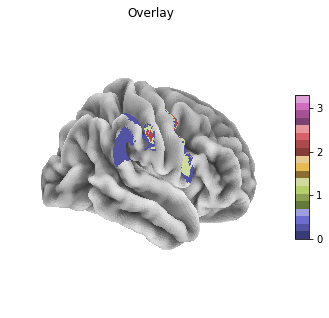

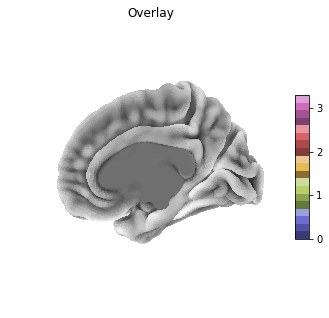

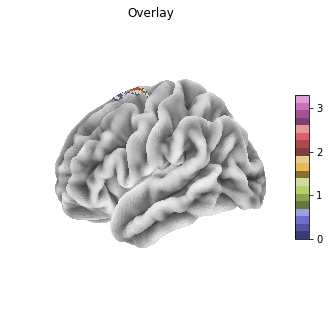

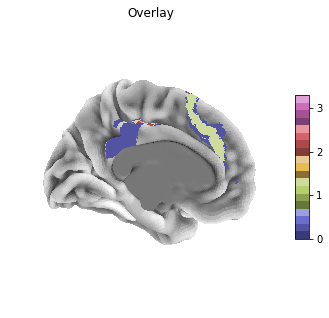

In [181]:
act_anat_surface_plots = MyMaskSurfacePlots(act_roi_atlas, "tab20b")

/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


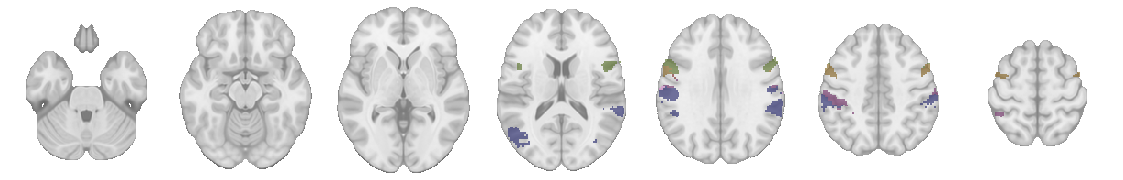

In [182]:
act_anat_plot_z = plotting.plot_roi(act_roi_atlas, display_mode = "z", cut_coords=np.arange(-30,61,15), cmap="tab20b", annotate=False, draw_cross=False, bg_img = template, black_bg = False)

In [183]:
act_anat_surface_plots.get('texture right lateral').savefig(plot_dir / 'act_anat_texture_fig_right_lateral')
act_anat_surface_plots.get('texture right medial').savefig(plot_dir / 'act_anat_texture_fig_right_medial')
act_anat_surface_plots.get('texture left lateral').savefig(plot_dir / 'act_anat_texture_fig_left_lateral')
act_anat_surface_plots.get('texture left medial').savefig(plot_dir / 'act_anat_texture_fig_left_medial')
act_anat_plot_z.savefig(plot_dir / 'act_anat_z_fig')

#### 4b Fp conjunction x Anat ROI Plot

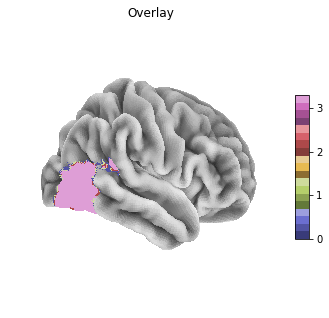

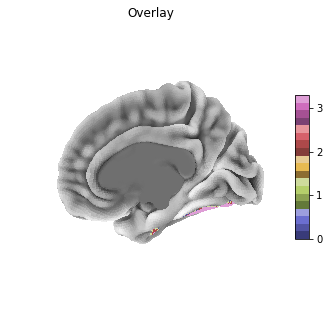

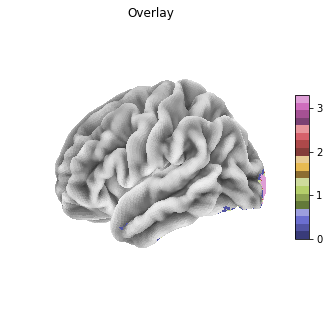

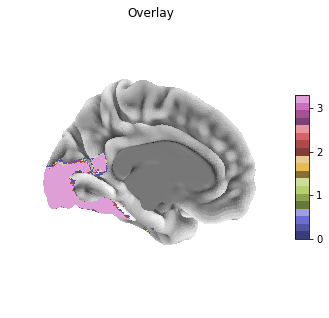

In [184]:
fp_anat_surface_plots = MyMaskSurfacePlots(fp_roi_atlas, "tab20b")

/usr/local/lib/python3.8/dist-packages/numpy/ma/core.py:2829: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


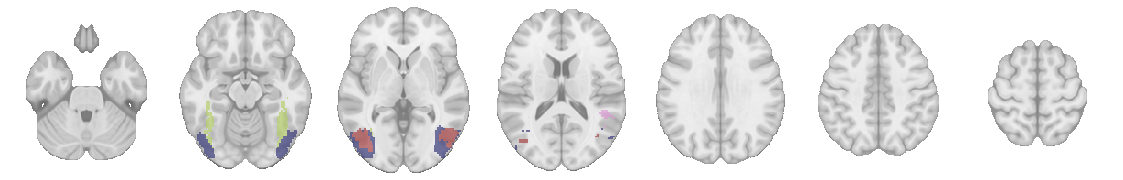

In [185]:
fp_anat_plot_z = plotting.plot_roi(fp_roi_atlas, display_mode = "z", cut_coords=np.arange(-30,61,15), cmap="tab20b", annotate=False, draw_cross=False, bg_img = template, black_bg = False)

In [186]:
fp_anat_surface_plots.get('texture right lateral').savefig(plot_dir / 'fp_anat_texture_fig_right_lateral')
fp_anat_surface_plots.get('texture right medial').savefig(plot_dir / 'fp_anat_texture_fig_right_medial')
fp_anat_surface_plots.get('texture left lateral').savefig(plot_dir / 'fp_anat_texture_fig_left_lateral')
fp_anat_surface_plots.get('texture left medial').savefig(plot_dir / 'fp_anat_texture_fig_left_medial')
fp_anat_plot_z.savefig(plot_dir / 'fp_anat_z_fig')